In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [2]:
samsung = fdr.DataReader('005930')
samsung.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-09-11,1224,1267,1218,1267,36810,NaN
1997-09-12,1250,1295,1247,1269,57590,0.001579
1997-09-13,1274,1277,1252,1269,28990,0.000000


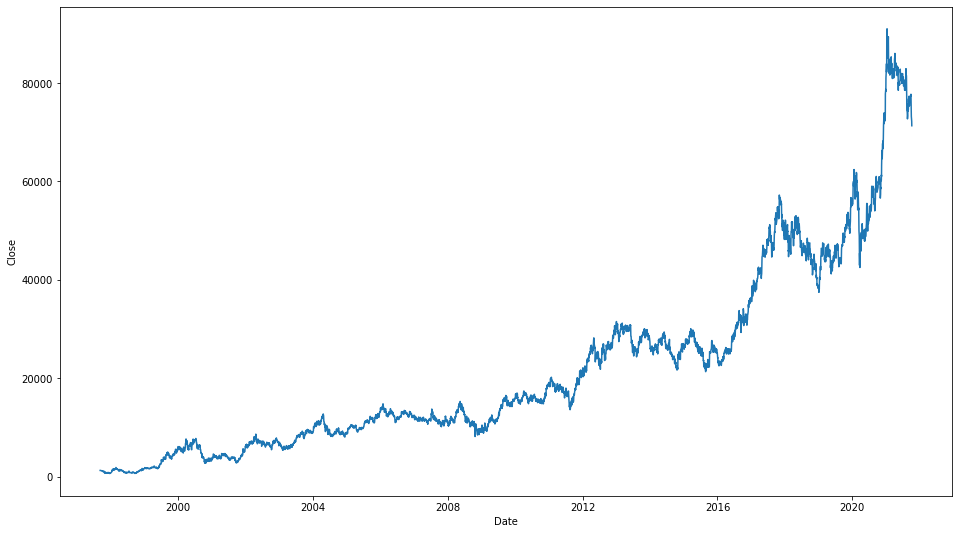

In [3]:
# 삼성전자 종가 데이터 시각화
plt.figure(figsize=(16,9))
sns.lineplot(x=samsung.index, y="Close", data=samsung)
plt.show()

In [7]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [9]:
samsung['y'] = samsung['Close']
samsung['ds'] = samsung.index
samsung

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
1997-09-11,1224,1267,1218,1267,36810,NaN,1267,1997-09-11
1997-09-12,1250,1295,1247,1269,57590,0.001579,1269,1997-09-12
1997-09-13,1274,1277,1252,1269,28990,0.000000,1269,1997-09-13
1997-09-18,1268,1283,1259,1274,77880,0.003940,1274,1997-09-18
1997-09-19,1276,1276,1242,1251,66390,-0.018053,1251,1997-09-19
...,...,...,...,...,...,...,...,...
2021-09-29,74800,75300,73800,74100,23992458,-0.028834,74100,2021-09-29
2021-09-30,74300,74800,73700,74100,19919361,0.000000,74100,2021-09-30
2021-10-01,73900,74000,72900,73200,15803395,-0.012146,73200,2021-10-01


In [26]:
m = Prophet(daily_seasonality=30, changepoint_prior_scale=0.01)
m.fit(samsung)

In [27]:
feature = m.make_future_dataframe(periods=30)
feature.tail(3)

,ds
6027,2021-11-03
6028,2021-11-04
6029,2021-11-05


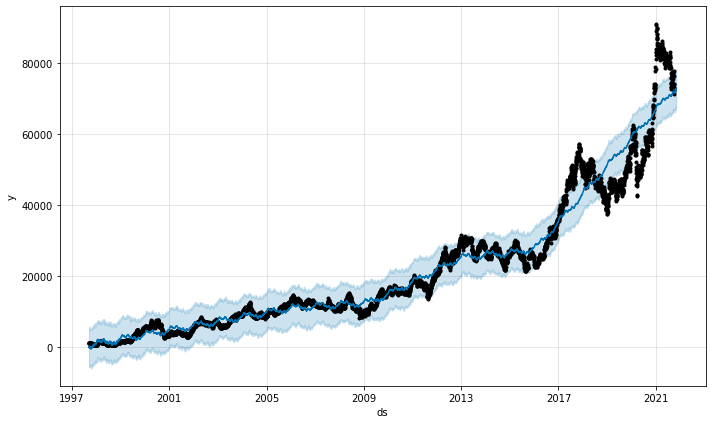

In [28]:
pred = m.predict(feature)
fig = m.plot(pred)

In [29]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          6030 non-null   datetime64[ns]
 1   trend                       6030 non-null   float64       
 2   yhat_lower                  6030 non-null   float64       
 3   yhat_upper                  6030 non-null   float64       
 4   trend_lower                 6030 non-null   float64       
 5   trend_upper                 6030 non-null   float64       
 6   additive_terms              6030 non-null   float64       
 7   additive_terms_lower        6030 non-null   float64       
 8   additive_terms_upper        6030 non-null   float64       
 9   daily                       6030 non-null   float64       
 10  daily_lower                 6030 non-null   float64       
 11  daily_upper                 6030 non-null   float64     

In [30]:
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
5990,2021-09-17,71714.419588,66295.402609,76811.940944
5991,2021-09-23,71886.633282,66140.410613,77386.242230
5992,2021-09-24,71827.131864,66957.478022,77068.549126
5993,2021-09-27,71818.072392,66245.764085,76886.902773
5994,2021-09-28,71893.611561,66868.769190,77452.455257
5995,2021-09-29,71857.674093,66740.319823,76812.848821
5996,2021-09-30,71870.457676,66747.599236,76843.102514
5997,2021-10-01,71796.891284,66485.571951,76768.005230
5998,2021-10-05,71837.736870,66439.706687,76943.206951
5999,2021-10-06,71803.663346,66495.759930,76815.962770


In [31]:
plot_components_plotly(m, pred)